<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/K-neighbors%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] #fish length(feature)
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]#fish weight(feature)

# 산점도 그리기

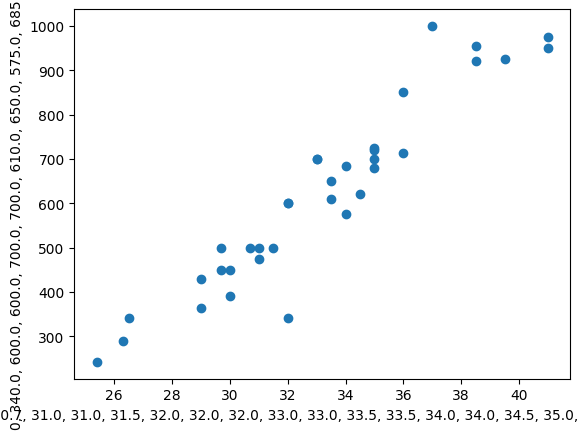

In [3]:
import matplotlib.pyplot as plt #matplotlib의 pyplot 함수를 plt로 주려서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel(bream_length) #x 축은 길이
plt.ylabel(bream_weight) #y 축은 무게
plt.show()

# 빙어 데이터 준비하기

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] #smelt length
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9] #smelt weight

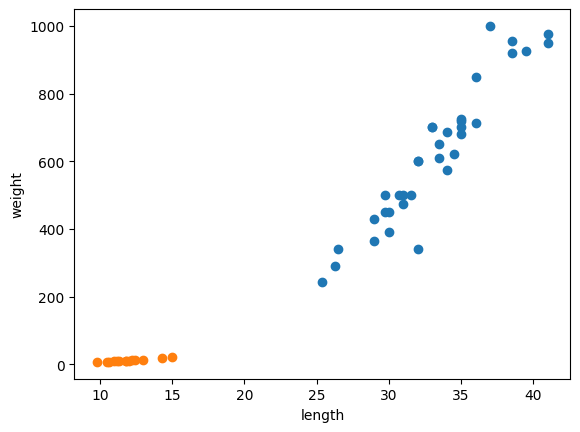

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') #x 축은 길이
plt.ylabel('weight') #y 축은 무게
plt.show()

# 두 리스트 하나로 합치기

In [6]:
length = bream_length +  smelt_length
weight = bream_weight + smelt_weight
print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# 2 차원 리스트로 만들기

In [30]:
fish_data = [[l, w] for l, w in zip(length, weight)] #zip() 함수는 나열된 리스트 각각에서 하니씩 원소를 꺼내 반환
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


<h1>라벨링</h1>

In [8]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# K-최 근접 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier 임포트

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier() #KNeighborsClassifier 객체 생성

In [11]:
kn.fit(fish_data, fish_target)#fir() 메서드로 훈련, feature 데이터랑 정답 데이터 둘을 매개 변수로 받음

KNeighborsClassifier()

In [12]:
kn.score(fish_data, fish_target) #score() 메서드로 모델 평가, feature 데이터랑 정답 데이터 둘을 매개 변수로 받음

# 0~1 사이의 값 반환

1.0

# K-neighbors algorithm
- 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용 Like 근묵자흑

In [14]:
kn.predict([[30, 600]])# preict() 메서드로 새로운 데이터의 정답을 예측, feature 데이터만 매개 변수로 받음
# 2차원 리스트로 전달해야함

array([1])

<h1> K-neighbors algorithm의 특징</h1>


*   장점: 간단함. 새로운 데이터에 대해서 예측해야할 때 주위에 어떤 데이터가 있는지 살피기만 하면 됨

*   단점: 데이터를 모두 가지고 있어야해서 메모리가 많이 필요하고 직선 거리를 계산 할때도 많은 시간 필요




In [15]:
print(kn._fit_X)# _fit_X 속성에 fish_data를 저장

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [18]:
print(kn._y)# _y에 fish_target 저장

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


# 가까운 몇 개의 데이터를 참고할 지 정하기 가능(기본 값은 5)

In [21]:
kn49 = KNeighborsClassifier(n_neighbors=49)#참고 데이터를 49개로 한 모델 n_neighbors 매개 변수로 이웃 값 지정

In [28]:
kn49.fit(fish_data, fish_target) #이러면 모든 데이터를 도미로 예측함
kn49.score(fish_data, fish_target) #데이터 중 다수를 차지하는게 도미니깐...

0.7142857142857143

In [29]:
print(35/49)

0.7142857142857143


<h1>KNeighborsClassifier()에 대한 추가 필기</h1>


*   p 매개 변수로 거리를 재는 방법 지정. 1일 경우 맨해튼 거리, 2일 경우 유클리디안 거리...기본값은 2
*   n_jobs 매개 변수로 사용한 CPU 코어 지정. -1은 모든 CPU 코어 사용...기본 값은 1



In [33]:
for n in range(5, 50): #처음으로 정확도가 1 밑으로 떨어지는 n의 값은 18이다
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score<1:
    print(n, score)
    break;

18 0.9795918367346939
